# IMPLEMENTATION OF OUR OWN AI ALGORITHM

Erfasser :

| Name | Matrikelnummer | E-Mail |
| :- | :- | :- |
| **Muhammad Abiyyu Mufti Hanif** | 60750 | hamu1013@h-ka.de |
| **Davin Farrel Lukito** | 75420 | luda1013@h-ka.de |

In this work, we are implementing 4 AI Methods:
- Decision Tree
- Random Forest
- K - Nearest Neighbor
- Convolutional Neural Networks


## Loading Data from Image Resources

In [1]:
# listing all images inside the resources!
from our_own_ai_process import OurDecisionTree, OurRandomForrest, OurKNearestNeighbour, OurCNN
from preprocessing import ImageResizer, FeatureExtraction, SimpleDatasetLoader
from imutils import paths
from preprocessing.image_to_array import ImageToArrayPreprocessor

In [2]:
# listing all images inside the resources!
imagePaths = list(paths.list_images("resources/"))
# initialize the image resizer, load the dataset from disk, and reshape the data matrix
sp = ImageResizer(256, 256)
# another image resizer for data in cnn
sp2 = ImageResizer(32, 32)
# initialize the feature extractor that will save it to csv file
f_ext = FeatureExtraction()
# initialize the converter to array using keras, will be use in cnn
iap = ImageToArrayPreprocessor()

# initialize data set loader that will load the images and do the preprocessing before it
sdl = SimpleDatasetLoader(preprocessors=[sp, f_ext, sp2, iap])

[INFO] loading images...
[INFO] processed 100/800
[INFO] processed 200/800
[INFO] processed 300/800
[INFO] processed 400/800
[INFO] processed 500/800
[INFO] processed 600/800
[INFO] processed 700/800
[INFO] processed 800/800


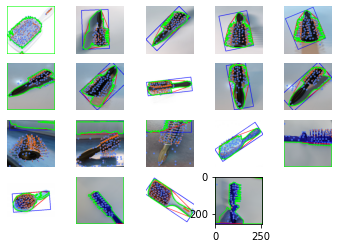

In [3]:
print("[INFO] loading images...")
# load the images
(data, label) = sdl.load(imagePaths, verbose=100, show=20)
# extract to the csv file

In [4]:
# extraction direct to panda data frame
df = f_ext.extract_to_panda(label)
df.sample(10)
# uncomment to extract to a csv file
# f_ext.extract_to_table("features.csv", labels)

,n_corner,n_h_corner,n_contour,a_rect,a_hull,a_approx,l_perimeters,wide/length,perim/a_rect,perim/a_hull,...,corner/a_hull,corner/a_appx,corner/l_perim,h_corner/a_rect,h_corner/a_hull,h_corner/a_appx,h_corner/l_perim,extent,solidity,labels
791,64,564,2,13142.643344,12970.0,12376.0,675.695520,4.864824,0.051412,0.052097,...,0.004934,0.005171,0.094717,0.042914,0.043485,0.045572,0.834695,0.941667,0.954202,1
53,87,650,19,29547.380356,23085.0,18041.0,1076.406197,0.494892,0.036430,0.046628,...,0.003769,0.004822,0.080825,0.021999,0.028157,0.036029,0.603861,0.610579,0.781503,0
424,66,455,2,33613.085242,32825.5,31857.0,774.208151,1.787471,0.023033,0.023586,...,0.002011,0.002072,0.085248,0.013536,0.013861,0.014283,0.587697,0.947756,0.970495,1
439,36,421,2,16731.998636,14634.0,14339.5,646.724957,0.264045,0.038652,0.044193,...,0.002460,0.002511,0.055665,0.025161,0.028769,0.029359,0.650972,0.857011,0.979876,1
252,44,146,1,65025.000000,64523.0,55126.0,1529.771640,1.000000,0.023526,0.023709,...,0.000682,0.000798,0.028762,0.002245,0.002263,0.002648,0.095439,0.847766,0.854362,0
716,39,372,2,8512.792389,8372.0,8199.0,509.455844,5.744723,0.059846,0.060852,...,0.004658,0.004757,0.076552,0.043699,0.044434,0.045371,0.730191,0.963139,0.979336,1
315,46,709,2,13108.000000,10882.5,8666.0,592.190906,0.256637,0.045178,0.054417,...,0.004227,0.005308,0.077678,0.054089,0.065150,0.081814,1.197249,0.661123,0.796324,0
121,100,472,15,20145.000000,19851.0,18464.0,893.882250,0.309804,0.044372,0.045030,...,0.005038,0.005416,0.111872,0.023430,0.023777,0.025563,0.528034,0.916555,0.930129,0
546,81,595,2,20496.221887,18769.5,18235.5,777.945301,4.829515,0.037956,0.041447,...,0.004316,0.004442,0.104120,0.029030,0.031700,0.032629,0.764835,0.889701,0.971550,1
608,100,23,2,35700.000000,34390.5,34206.5,784.384776,1.821429,0.021972,0.022808,...,0.002908,0.002923,0.127488,0.000644,0.000669,0.000672,0.029322,0.958165,0.994650,1


## Decision Tree

In [5]:
ODT = OurDecisionTree()
ODT.fit(df, 0.1)
ODT.train()
ODT.plot_tree()

{'extent <= 0.6544982619740012': [{'corner/l_perim <= 0.056907711272047995': [{'perim/a_appx <= 0.08466120858049385': [{'h_corner/l_perim <= 0.22808458317993546': [{'solidity <= 0.6324836601307189': [{'solidity <= 0.5918608124666901': [1.0,
                                                                                                                                                                                                                                            0.0]},
                                                                                                                                                                                                        1.0]},
                                                                                                                                                                    {'corner/l_perim <= 0.04131734107376049': [0.0,
                                                                                                 

In [6]:
ODT.predict()
print(*ODT.review())

              precision    recall  f1-score   support

       brush       0.88      0.88      0.88        43
        comb       0.86      0.86      0.86        37

    accuracy                           0.88        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80
 [[38  5]
 [ 5 32]]


## Random Forest

In [7]:
ORF = OurRandomForrest()
ORF.fit(df, 0.1)
ORF.train()
ORF.predict()
print(*ORF.review())

              precision    recall  f1-score   support

       brush       0.63      0.84      0.72        37
        comb       0.81      0.58      0.68        43

    accuracy                           0.70        80
   macro avg       0.72      0.71      0.70        80
weighted avg       0.73      0.70      0.70        80
 [[31  6]
 [18 25]]


## K-Nearest Neighbor

In [8]:
fiveNearestNeighbour = OurKNearestNeighbour(5, "euclidean")
fiveNearestNeighbour.fit(df, 0.10)
fiveNearestNeighbour.predict()
print(*fiveNearestNeighbour.review())

              precision    recall  f1-score   support

       brush       0.83      0.89      0.86        44
        comb       0.85      0.78      0.81        36

    accuracy                           0.84        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80
 [[39  5]
 [ 8 28]]


## Convolutional Neural Networks

In [12]:
cnn = OurCNN(32, 32, 3, 0.01, 50, 400)
cnn.fit((data, label), 0.25)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 65538     
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
Total params: 66,434
Trainable params: 66,434
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
cnn.train()

Epoch 1/400
12/12 [==============================] - 1s 40ms/step - loss: 0.7370 - accuracy: 0.5033 - val_loss: 0.7145 - val_accuracy: 0.5100
Epoch 2/400
12/12 [==============================] - 0s 32ms/step - loss: 0.6984 - accuracy: 0.5267 - val_loss: 0.6861 - val_accuracy: 0.5250
Epoch 3/400
12/12 [==============================] - 0s 30ms/step - loss: 0.7079 - accuracy: 0.5133 - val_loss: 0.7676 - val_accuracy: 0.4950
Epoch 4/400
12/12 [==============================] - 0s 30ms/step - loss: 0.6870 - accuracy: 0.5733 - val_loss: 0.6754 - val_accuracy: 0.5800
Epoch 5/400
12/12 [==============================] - 0s 32ms/step - loss: 0.6915 - accuracy: 0.5333 - val_loss: 0.6718 - val_accuracy: 0.6100
Epoch 6/400
12/12 [==============================] - 0s 31ms/step - loss: 0.6852 - accuracy: 0.5650 - val_loss: 0.7424 - val_accuracy: 0.5000
Epoch 7/400
12/12 [==============================] - 0s 31ms/step - loss: 0.6768 - accuracy: 0.5767 - val_loss: 0.6691 - val_accuracy: 0.5850
Epoch 

12/12 [==============================] - 0s 38ms/step - loss: 0.5597 - accuracy: 0.7133 - val_loss: 0.6032 - val_accuracy: 0.6900
Epoch 59/400
12/12 [==============================] - 0s 33ms/step - loss: 0.5776 - accuracy: 0.6850 - val_loss: 0.6060 - val_accuracy: 0.6900
Epoch 60/400
12/12 [==============================] - 0s 32ms/step - loss: 0.5460 - accuracy: 0.7233 - val_loss: 0.6140 - val_accuracy: 0.6600
Epoch 61/400
12/12 [==============================] - 0s 29ms/step - loss: 0.5734 - accuracy: 0.6800 - val_loss: 0.6073 - val_accuracy: 0.6750
Epoch 62/400
12/12 [==============================] - 0s 30ms/step - loss: 0.5676 - accuracy: 0.7050 - val_loss: 0.7096 - val_accuracy: 0.5500
Epoch 63/400
12/12 [==============================] - 0s 32ms/step - loss: 0.5835 - accuracy: 0.6950 - val_loss: 0.5997 - val_accuracy: 0.7000
Epoch 64/400
12/12 [==============================] - 0s 31ms/step - loss: 0.5629 - accuracy: 0.7017 - val_loss: 0.6077 - val_accuracy: 0.6700
Epoch 65/400

12/12 [==============================] - 0s 34ms/step - loss: 0.5043 - accuracy: 0.7583 - val_loss: 0.6334 - val_accuracy: 0.6600
Epoch 116/400
12/12 [==============================] - 0s 37ms/step - loss: 0.4683 - accuracy: 0.8050 - val_loss: 0.5761 - val_accuracy: 0.6850
Epoch 117/400
12/12 [==============================] - 0s 30ms/step - loss: 0.5060 - accuracy: 0.7350 - val_loss: 0.5643 - val_accuracy: 0.7300
Epoch 118/400
12/12 [==============================] - 0s 30ms/step - loss: 0.5295 - accuracy: 0.7317 - val_loss: 0.5860 - val_accuracy: 0.6900
Epoch 119/400
12/12 [==============================] - 0s 30ms/step - loss: 0.4799 - accuracy: 0.7850 - val_loss: 0.5632 - val_accuracy: 0.7350
Epoch 120/400
12/12 [==============================] - 0s 29ms/step - loss: 0.4829 - accuracy: 0.7617 - val_loss: 0.5770 - val_accuracy: 0.6950
Epoch 121/400
12/12 [==============================] - 0s 29ms/step - loss: 0.4630 - accuracy: 0.7950 - val_loss: 0.5659 - val_accuracy: 0.7300
Epoch 

Epoch 172/400
12/12 [==============================] - 0s 29ms/step - loss: 0.4068 - accuracy: 0.8233 - val_loss: 0.5436 - val_accuracy: 0.7450
Epoch 173/400
12/12 [==============================] - 0s 32ms/step - loss: 0.4268 - accuracy: 0.8050 - val_loss: 0.6094 - val_accuracy: 0.6750
Epoch 174/400
12/12 [==============================] - 0s 31ms/step - loss: 0.4105 - accuracy: 0.8400 - val_loss: 0.5751 - val_accuracy: 0.6950
Epoch 175/400
12/12 [==============================] - 0s 30ms/step - loss: 0.4202 - accuracy: 0.8250 - val_loss: 0.5495 - val_accuracy: 0.7250
Epoch 176/400
12/12 [==============================] - 0s 30ms/step - loss: 0.4035 - accuracy: 0.8350 - val_loss: 0.5389 - val_accuracy: 0.7500
Epoch 177/400
12/12 [==============================] - 0s 30ms/step - loss: 0.4128 - accuracy: 0.8317 - val_loss: 0.7487 - val_accuracy: 0.5950
Epoch 178/400
12/12 [==============================] - 0s 30ms/step - loss: 0.4293 - accuracy: 0.8267 - val_loss: 0.5470 - val_accuracy:

Epoch 229/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3601 - accuracy: 0.8650 - val_loss: 0.5301 - val_accuracy: 0.7450
Epoch 230/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3760 - accuracy: 0.8483 - val_loss: 0.5793 - val_accuracy: 0.7000
Epoch 231/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3540 - accuracy: 0.8733 - val_loss: 0.5499 - val_accuracy: 0.7300
Epoch 232/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3760 - accuracy: 0.8483 - val_loss: 0.5271 - val_accuracy: 0.7400
Epoch 233/400
12/12 [==============================] - 0s 29ms/step - loss: 0.3534 - accuracy: 0.8733 - val_loss: 0.5281 - val_accuracy: 0.7450
Epoch 234/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3487 - accuracy: 0.8633 - val_loss: 0.5272 - val_accuracy: 0.7450
Epoch 235/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3500 - accuracy: 0.8733 - val_loss: 0.6225 - val_accuracy:

Epoch 286/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3112 - accuracy: 0.8867 - val_loss: 0.5199 - val_accuracy: 0.7750
Epoch 287/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3177 - accuracy: 0.8850 - val_loss: 0.6617 - val_accuracy: 0.6800
Epoch 288/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3325 - accuracy: 0.8583 - val_loss: 0.5832 - val_accuracy: 0.7250
Epoch 289/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3369 - accuracy: 0.8483 - val_loss: 0.5142 - val_accuracy: 0.7750
Epoch 290/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3065 - accuracy: 0.8967 - val_loss: 0.5148 - val_accuracy: 0.7800
Epoch 291/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3255 - accuracy: 0.8767 - val_loss: 0.5357 - val_accuracy: 0.7550
Epoch 292/400
12/12 [==============================] - 0s 30ms/step - loss: 0.3319 - accuracy: 0.8650 - val_loss: 0.5986 - val_accuracy:

Epoch 343/400
12/12 [==============================] - 0s 31ms/step - loss: 0.2635 - accuracy: 0.9117 - val_loss: 0.5260 - val_accuracy: 0.7600
Epoch 344/400
12/12 [==============================] - 0s 30ms/step - loss: 0.2768 - accuracy: 0.9050 - val_loss: 0.5409 - val_accuracy: 0.7450
Epoch 345/400
12/12 [==============================] - 0s 30ms/step - loss: 0.2674 - accuracy: 0.8983 - val_loss: 0.5415 - val_accuracy: 0.7350
Epoch 346/400
12/12 [==============================] - 0s 31ms/step - loss: 0.2786 - accuracy: 0.8983 - val_loss: 0.5940 - val_accuracy: 0.7400
Epoch 347/400
12/12 [==============================] - 0s 29ms/step - loss: 0.2704 - accuracy: 0.8917 - val_loss: 0.5173 - val_accuracy: 0.7950
Epoch 348/400
12/12 [==============================] - 0s 30ms/step - loss: 0.2630 - accuracy: 0.9133 - val_loss: 0.6414 - val_accuracy: 0.7300
Epoch 349/400
12/12 [==============================] - 0s 30ms/step - loss: 0.2984 - accuracy: 0.8683 - val_loss: 0.5166 - val_accuracy:

12/12 [==============================] - 0s 31ms/step - loss: 0.2506 - accuracy: 0.9067 - val_loss: 0.5214 - val_accuracy: 0.7850
Epoch 400/400
12/12 [==============================] - 0s 35ms/step - loss: 0.2292 - accuracy: 0.9317 - val_loss: 0.5207 - val_accuracy: 0.7900


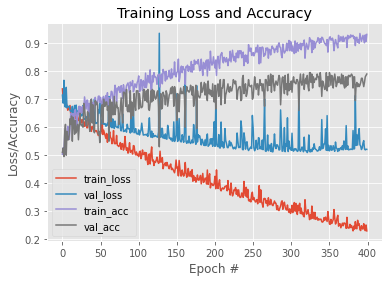

              precision    recall  f1-score   support

       brush       0.78      0.81      0.80       102
        comb       0.80      0.77      0.78        98

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200
 [[83 19]
 [23 75]]


In [15]:
cnn.plot_history()
cnn.predict()
print(*cnn.review())